# Creating a Polarized Mie Scattering Table

This notebook demonstrates how to create a Mie scattering table using src/polarized/make_mie_table.f90. 

The source Fortran code was created by Frank Evans and it is part of the SHDOM package: http://nit.colorado.edu/shdom.html

The python wrapper was created by Aviad Levis, Technion inst. of Technology 2019: https://github.com/aviadlevis/pyshdom

In [1]:
"""
Imports necessary for this notebook
"""
import os 
import numpy as np
import matplotlib.pyplot as plt
from shdom import MiePolarized

In [4]:
mie = MiePolarized()

wavelength_band = (0.86, 0.86)
particle_type='Water' 
distribution='gamma'
alpha=97.0

mie.set_parameters(wavelength_band=wavelength_band,
                   particle_type=particle_type,
                   distribution=distribution,
                   alpha=alpha)

num_effective_radii=50
start_effective_radius=5.0
end_effective_radius=20.0
max_integration_radius=60.0
log_space_reff=False

mie.compute_table(num_effective_radii=num_effective_radii,
                  start_effective_radius=start_effective_radius,
                  end_effective_radius=end_effective_radius,
                  max_integration_radius=max_integration_radius,
                  log_space_reff=log_space_reff)

Computing mie table...
Done.


In [5]:
""" 
Create a directory (if doesnt exist) and write the Polarized Mie table, that was created 
in the previous cell, for for later use.
"""
directory = '../mie_tables'

# safe creation of the directory
if not os.path.exists(directory):
    os.makedirs(directory)
output_path = os.path.join(directory, 'Water_860nm_pol.scat')

mie.write_table(output_path)

Writing mie table to file: ../mie_tables/Water_860nm_pol.scat
Done.


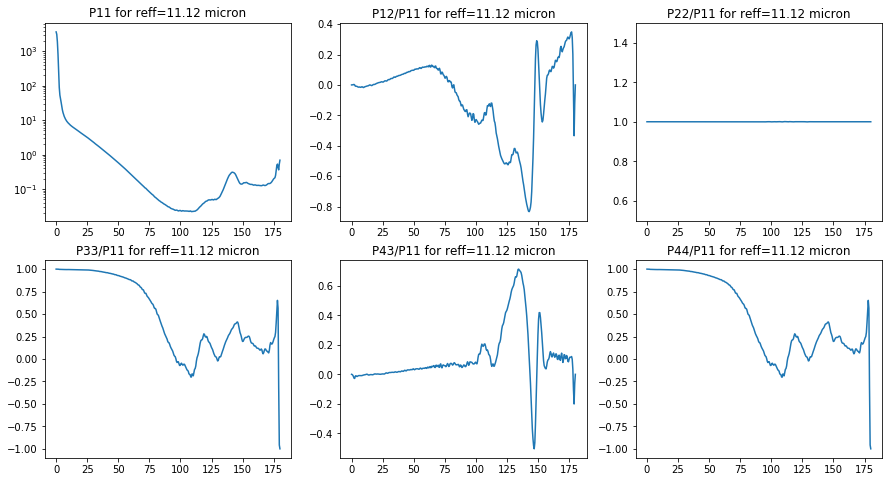

In [6]:
"""
Convert wigner coefficients into a scattering phase function matrix and plot all components
See Figure 2 of the IPRT comparison project: https://arxiv.org/pdf/1901.01813.pdf
"""

plot_index = 20
plot_re = mie.reff[plot_index]

angles = np.linspace(0,180, 360)
phase = []
for i in range(1,7):
    phase.append(mie.transform_wignerd_to_phase(plot_index, phase_element=i, angles=angles))
    
%matplotlib inline
f, axes = plt.subplots(2, 3, figsize=(15,8));
axes[0, 0].semilogy(angles, phase[0]);
axes[0, 0].set_title('P11 for reff=%2.2f micron' %plot_re);
axes[0, 1].plot(angles, phase[4]/phase[0]);
axes[0, 1].set_title('P12/P11 for reff=%2.2f micron' %plot_re);
axes[0, 2].plot(angles, phase[1]/phase[0]);
axes[0, 2].set_title('P22/P11 for reff=%2.2f micron' %plot_re);
axes[0, 2].set_ylim([0.5,1.5]);
axes[1, 0].plot(angles, phase[3]/phase[0]);
axes[1, 0].set_title('P33/P11 for reff=%2.2f micron' %plot_re);
axes[1, 1].plot(angles, phase[5]/phase[0]);
axes[1, 1].set_title('P43/P11 for reff=%2.2f micron' %plot_re);
axes[1, 2].plot(angles, phase[2]/phase[0]);
axes[1, 2].set_title('P44/P11 for reff=%2.2f micron' %plot_re);

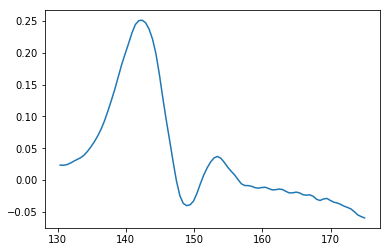

In [20]:
plt.plot(angles[260:350], -phase[4][260:350])

array([ 130.36211699,  130.86350975,  131.36490251,  131.86629526,
        132.36768802,  132.86908078,  133.37047354,  133.8718663 ,
        134.37325905,  134.87465181,  135.37604457,  135.87743733,
        136.37883008,  136.88022284,  137.3816156 ,  137.88300836,
        138.38440111,  138.88579387,  139.38718663,  139.88857939,
        140.38997214,  140.8913649 ,  141.39275766,  141.89415042,
        142.39554318,  142.89693593,  143.39832869,  143.89972145,
        144.40111421,  144.90250696,  145.40389972,  145.90529248,
        146.40668524,  146.90807799,  147.40947075,  147.91086351,
        148.41225627,  148.91364903,  149.41504178,  149.91643454,
        150.4178273 ,  150.91922006,  151.42061281,  151.92200557,
        152.42339833,  152.92479109,  153.42618384,  153.9275766 ,
        154.42896936,  154.93036212,  155.43175487,  155.93314763,
        156.43454039,  156.93593315,  157.43732591,  157.93871866,
        158.44011142,  158.94150418,  159.44289694,  159.94428